In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv(r'C:\Users\deepak.mukati\OneDrive\Desktop\Internship//olxdata.csv')

In [82]:
df.head()

,Unnamed: 0,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,55483,7315914053,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,van,NaN,NaN,ca,32.792800,-116.966500
1,162368,7310885048,13995,2017.0,mazda,cx-3,NaN,4 cylinders,gas,7037.0,rebuilt,automatic,NaN,NaN,SUV,white,NaN,ia,41.207382,-96.023096
2,234393,7308243856,19990,2019.0,mitsubishi,eclipse cross sp,good,NaN,gas,35313.0,clean,other,4wd,NaN,hatchback,white,NaN,nc,35.190000,-80.830000
3,276110,7315817729,0,2019.0,honda,cr-v,NaN,NaN,gas,25626.0,clean,automatic,NaN,NaN,SUV,orange,NaN,ny,40.854573,-74.120219
4,349033,7301620999,42900,2015.0,chevrolet,corvette,excellent,8 cylinders,gas,29000.0,clean,automatic,NaN,NaN,convertible,black,NaN,sc,34.755562,-82.906419


In [83]:
df.columns

Index(['Unnamed: 0', 'id', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'county',
       'state', 'lat', 'long'],
      dtype='object')

In [84]:
df.drop(columns =['Unnamed: 0', 'id', 'model',
       'condition', 'cylinders', 'odometer', 'title_status',
        'size', 'type', 'county',
       'state', 'lat', 'long'],inplace=True)

In [85]:
df.describe()

,price,year
count,6.403200e+04,63874.000000
mean,2.005202e+04,2011.243542
std,4.651339e+05,9.442033
min,0.000000e+00,1903.000000
25%,5.900000e+03,2008.000000
50%,1.390000e+04,2014.000000
75%,2.600000e+04,2017.000000
max,1.134568e+08,2022.000000


In [86]:
df.shape

(64032, 7)

In [87]:
df.isnull().sum()

price               0
year              158
manufacturer     2569
fuel              424
transmission      353
drive           19471
paint_color     19505
dtype: int64

In [88]:
df.isnull().sum().sum()

42480

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

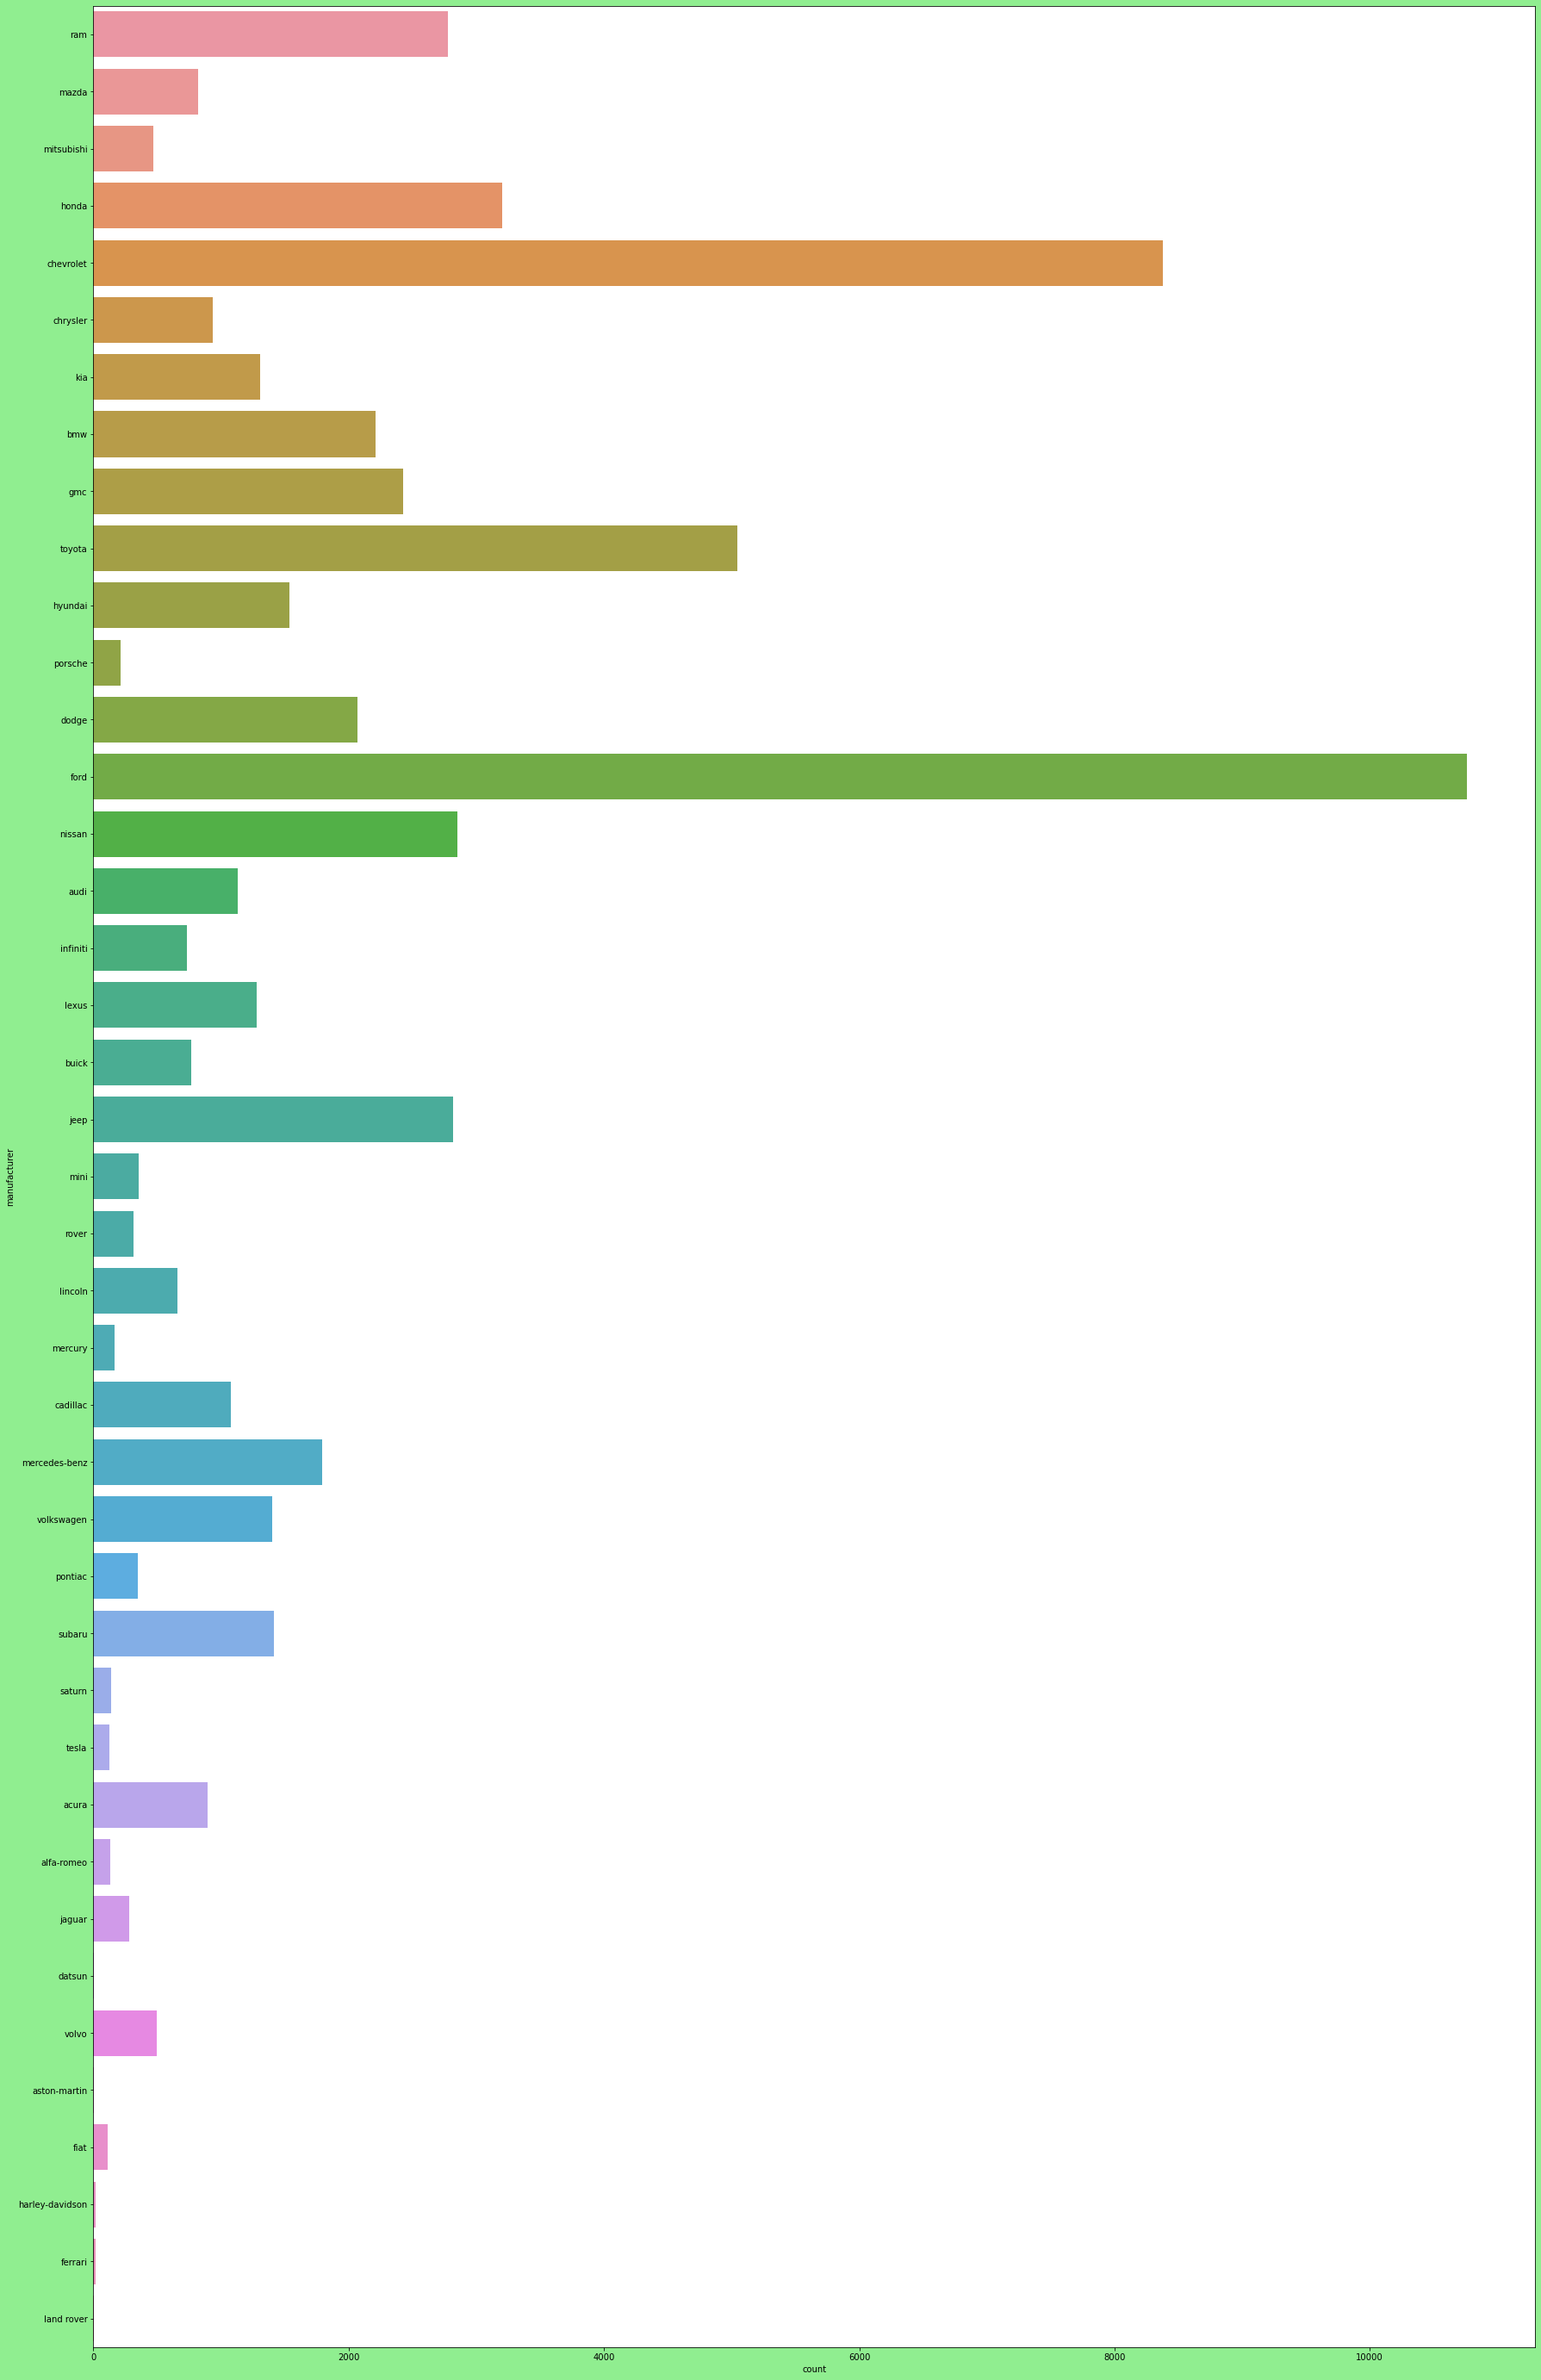

In [89]:
plt.figure(figsize=(30,50),facecolor='lightgreen')
sns.countplot(y='manufacturer', data=df)

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

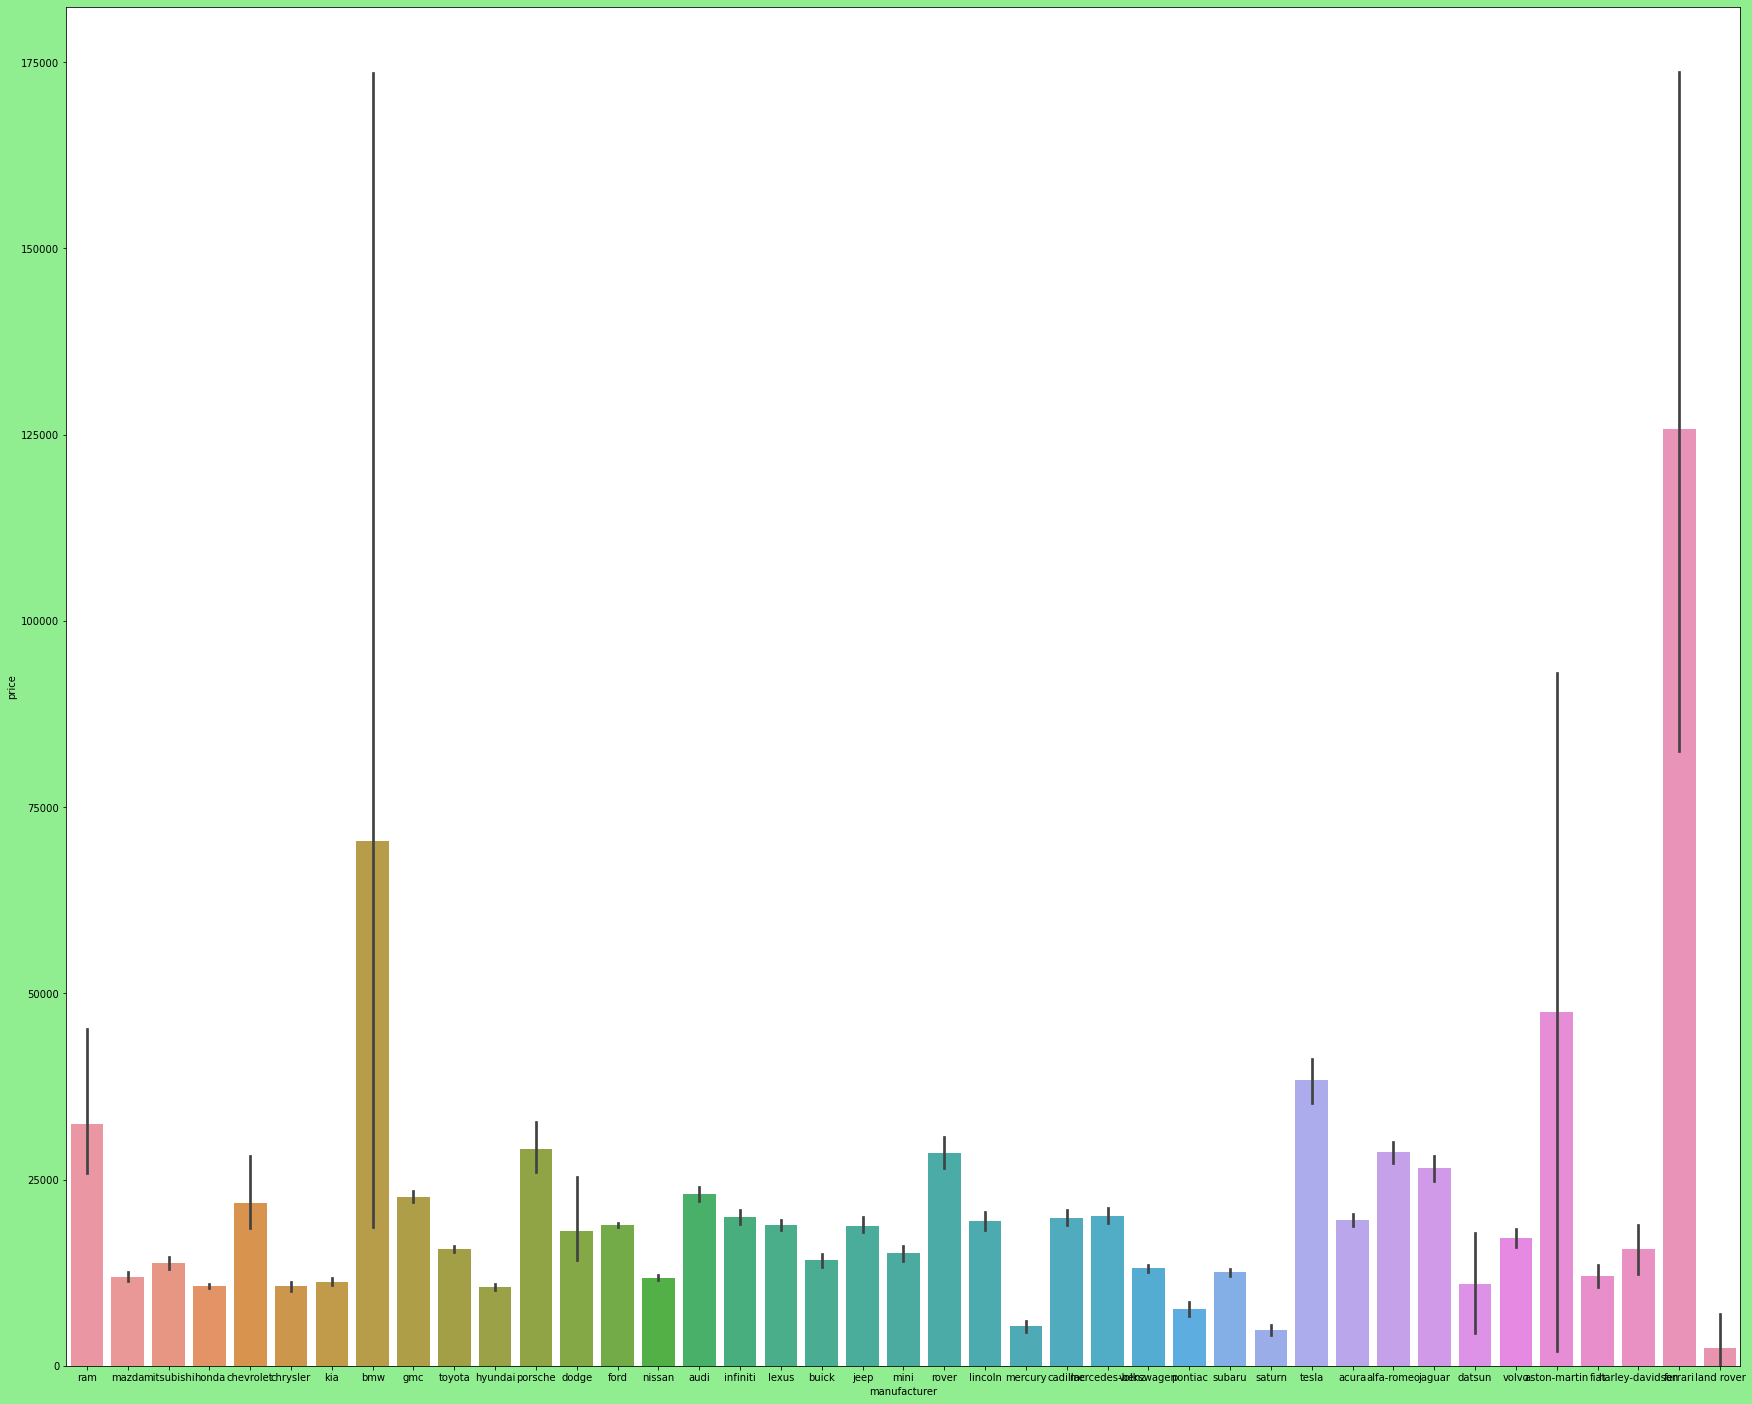

In [90]:
plt.figure(figsize=(30,25),facecolor='lightgreen')
sns.barplot(x='manufacturer', y='price', data=df)

<AxesSubplot:xlabel='transmission', ylabel='price'>

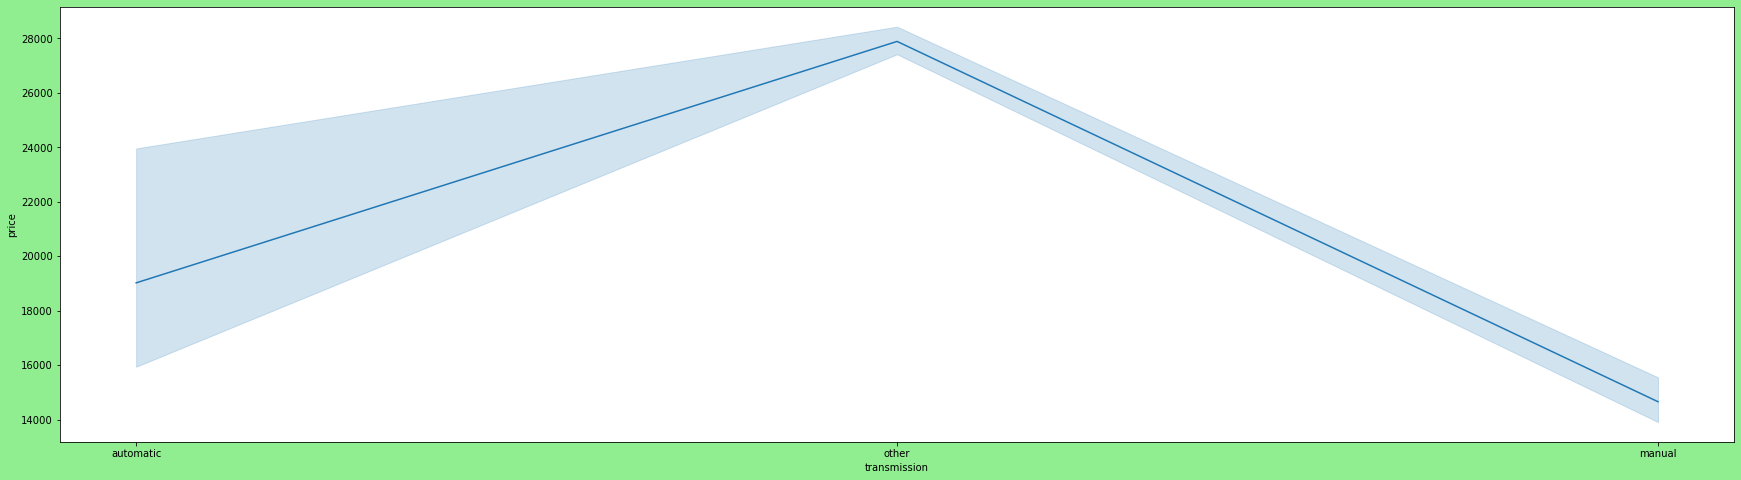

In [91]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.lineplot(x='transmission', y='price', data=df)

<AxesSubplot:xlabel='fuel', ylabel='price'>

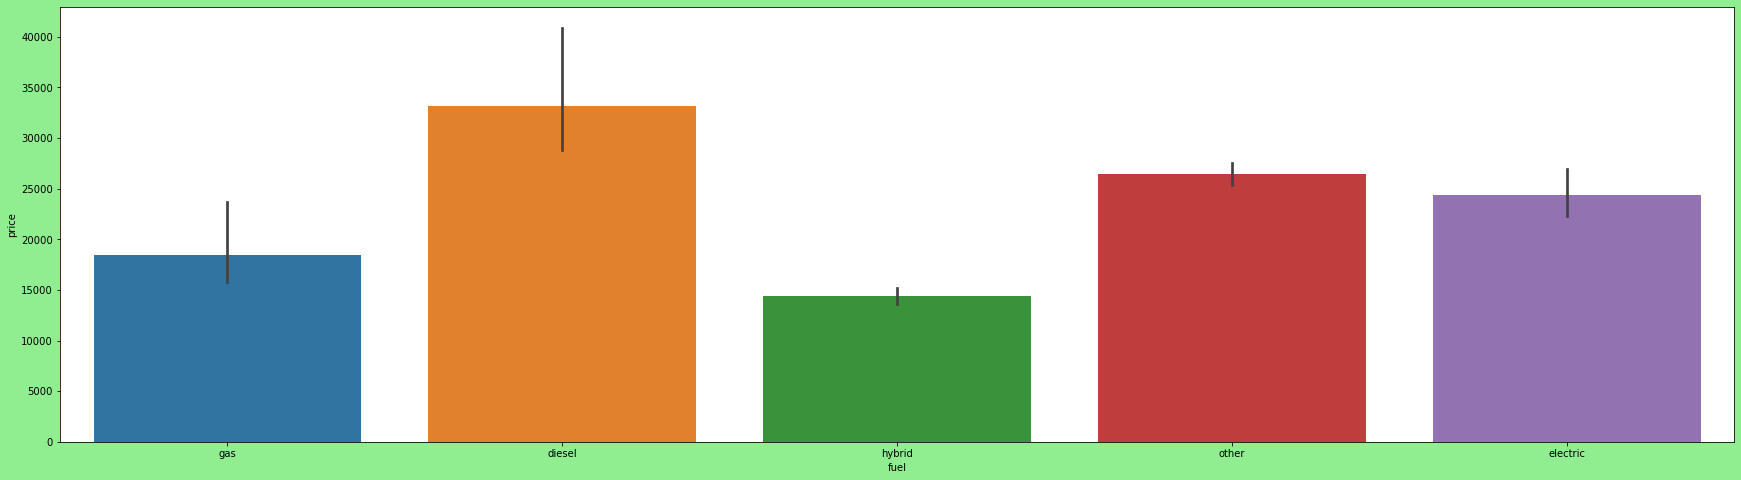

In [92]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.barplot(x='fuel', y='price' ,data=df)

<AxesSubplot:xlabel='paint_color', ylabel='price'>

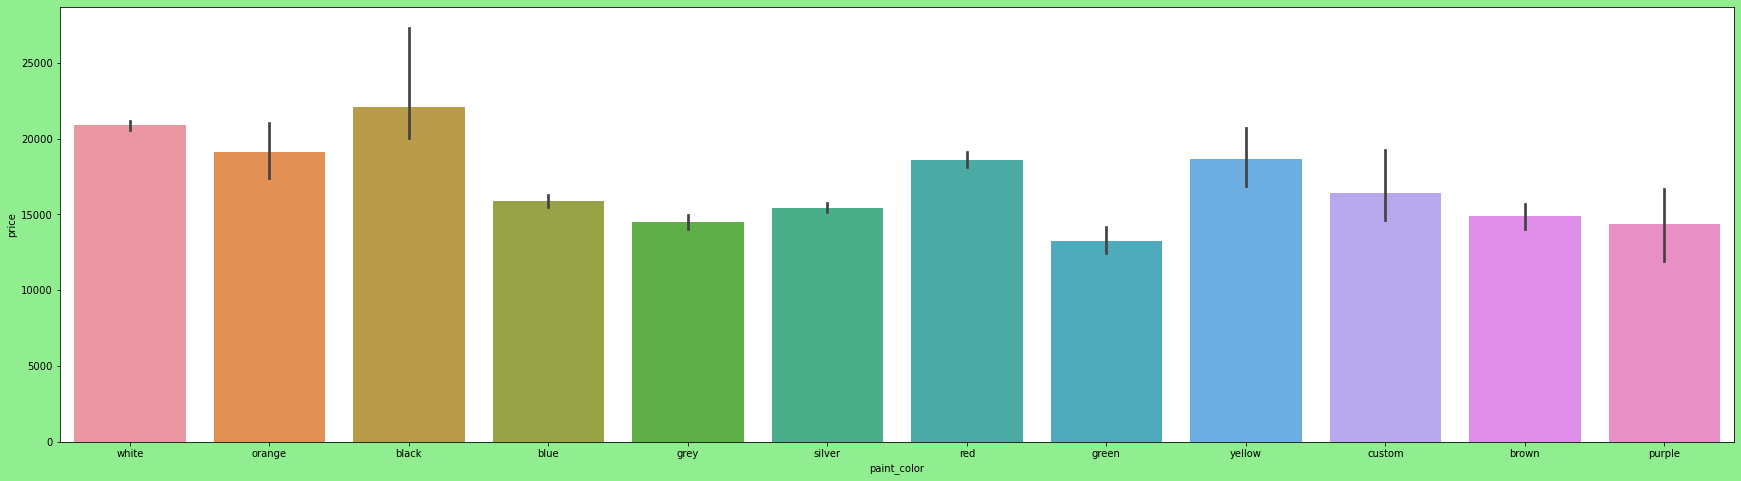

In [93]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.barplot(x='paint_color', y='price' ,data=df)

<AxesSubplot:xlabel='drive', ylabel='price'>

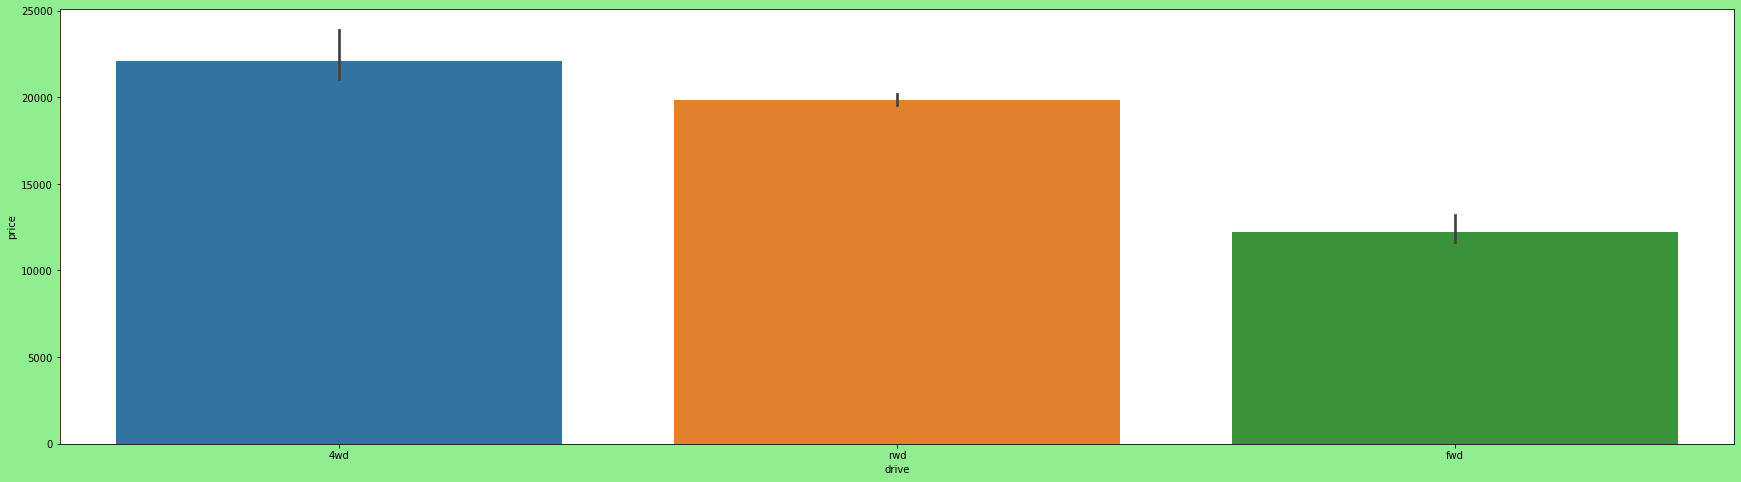

In [94]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.barplot(x='drive', y='price',data=df)

<AxesSubplot:xlabel='drive', ylabel='price'>

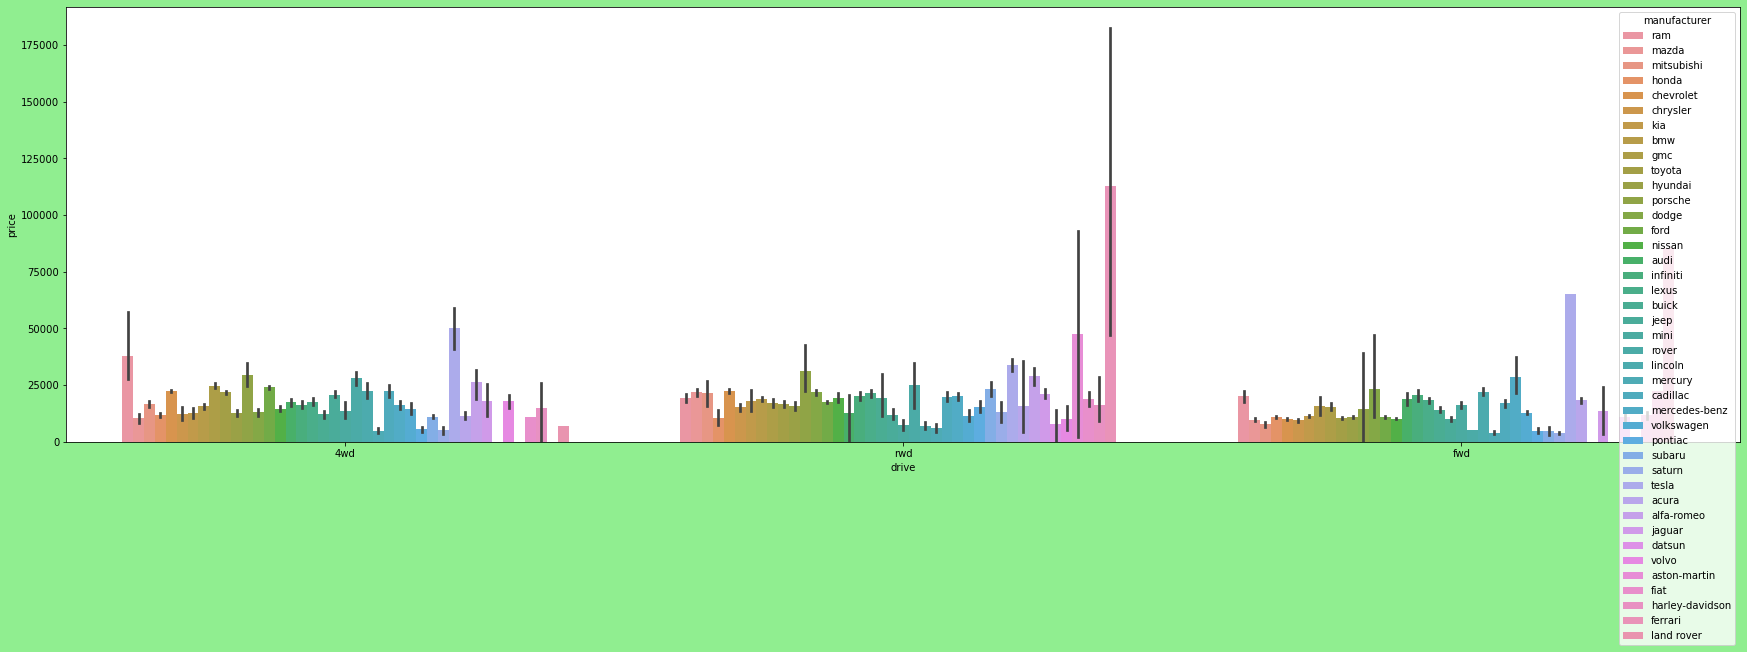

In [95]:
plt.figure(figsize=(30,8),facecolor='lightgreen')
sns.barplot(x='drive', y='price',hue='manufacturer',data=df)

In [96]:
df.dtypes

price             int64
year            float64
manufacturer     object
fuel             object
transmission     object
drive            object
paint_color      object
dtype: object

In [97]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,price,year,manufacturer,fuel,transmission,drive,paint_color
0,0,2018.0,33.0,2.0,0.0,NaN,NaN
1,13995,2017.0,25.0,2.0,0.0,NaN,10.0
2,19990,2019.0,29.0,2.0,2.0,0.0,10.0
3,0,2019.0,16.0,2.0,0.0,NaN,6.0
4,42900,2015.0,7.0,2.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
64027,3495,1997.0,27.0,2.0,0.0,2.0,10.0
64028,25590,2018.0,24.0,3.0,2.0,1.0,10.0
64029,22421,2015.0,26.0,2.0,0.0,2.0,0.0
64030,29999,2013.0,20.0,2.0,0.0,0.0,10.0


In [110]:
df['year']= df['year'].fillna(0)
df['manufacturer']= df['manufacturer'].fillna(0)
df['fuel']= df['fuel'].fillna(0)
df['transmission']= df['transmission'].fillna(0)
df['drive']= df['drive'].fillna(0)
df['paint_color']= df['paint_color'].fillna(0)

In [111]:
df.skew()

price           229.776999
year            -19.793002
manufacturer      0.449445
fuel             -0.055845
transmission      1.687174
drive             1.004212
paint_color       0.392738
dtype: float64

In [112]:
y = df['price']
X = df.drop(columns=['price'])

In [113]:
np.abs(3)

3

In [114]:
np.abs(-3)

3

In [115]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

year            False
manufacturer     True
fuel             True
transmission     True
drive            True
paint_color      True
dtype: bool

In [116]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [117]:
X_scaled.shape[1]

6

In [118]:
rf = RandomForestRegressor()
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.7933905849777698
At random state0,the testing accuracy is:--49.588412048298736


At random state1,the training accuracy is:-0.728275604910757
At random state1,the testing accuracy is:--0.01906601855080714


At random state2,the training accuracy is:-0.8349324852666979
At random state2,the testing accuracy is:--3.1314302242400096


At random state3,the training accuracy is:-0.8569494767863582
At random state3,the testing accuracy is:--6.684274920391


At random state4,the training accuracy is:-0.8277048837155158
At random state4,the testing accuracy is:--9.81302673157077


At random state5,the training accuracy is:-0.7639971199660867
At random state5,the testing accuracy is:--1.8519553319505029


At random state6,the training accuracy is:-0.7930935408337737
At random state6,the testing accuracy is:--252.5809118741614


At random state7,the training accuracy is:-0.8109524228524194
At random state7,the testing accuracy is:--3.529678648774036




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DEEPAK~1.MUK\AppData\Local\Temp/ipykernel_7752/1781595665.py", line 4, in <module>
    rf.fit(X_train,y_train)
  File "E:\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_backends.py", 

TypeError: object of type 'NoneType' has no len()

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [120]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: -140.1734887067693
cross val score: -12089.036919566737


In [121]:
y_pred=rf.predict(X_test)
y_train.head()

19110    26990
61016    43990
8008      3600
44124    26990
21696    27990
Name: price, dtype: int64

In [122]:
#Adjusted R2 score
rf.score(X_train,y_train)

0.8322497923274323

In [123]:
rf.score(X_test,y_test)

-1.401734887067693

In [124]:
#lets plot and visualize
y_pred=rf.predict(X_test)
y_pred

array([19468.15642857, 28333.92777778,  2761.99183333, ...,
       12634.45183888,  7559.70880859,  8642.41416667])

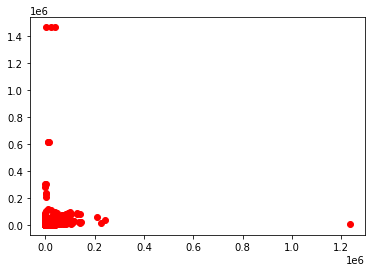

In [125]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual PRICE'
plt.ylabel='Predicted PRICE'
plt.title='Actual vs model predicted '
plt.show()

In [126]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 7636.681431596823
MSE: 858162234.184689
RMSE: 29294.406192730534


In [127]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)

R2 score: -200.37722669696097


In [128]:
dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)

cross val score: -100.61720561277194


In [129]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 7882.623873502522
MSE: 1073275794.7118062
RMSE: 32760.88818563694


In [130]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
modelr=r2_score(y_test,y_pred)
print('R2 score:',modelr*100)
modelscore=cross_val_score(model,X,y,cv=5)
modelr=modelscore.mean()
print('cross val score:',modelr*100)

R2 score: -219.94089170380056
cross val score: -290.82862671027226


In [131]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 7753.512624912281
MSE: 1143178591.0675187
RMSE: 33810.92413802851


In [132]:
import xgboost as xgb
from xgboost import XGBRegressor
xg=XGBRegressor()

In [133]:
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=r2_score(y_test,y_pred)
print('R2 score:',xg_score*100)
xgscore=cross_val_score(xg,X,y,cv=5)
xgr=dtscore.mean()
print('cross val score:',xgr*100)

R2 score: -125.95633430373425
cross val score: -100.61720561277194


In [134]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 8215.988483463208
MSE: 807363017.9516553
RMSE: 28414.1341228561


In [135]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
y_pred=ada.predict(X_test)
ada_score=r2_score(y_test,y_pred)
print('R2 score:',ada_score*100)

R2 score: -1854.4634587766247


In [136]:
adascore=cross_val_score(ada,X,y,cv=5)
adab=adascore.mean()
print('cross val score:',adab*100)

cross val score: -1129.3209288320033


In [137]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 12611.057082718933
MSE: 6983479889.671977
RMSE: 83567.21779305553


In [138]:
parameters ={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'min_samples_split':[2], 
             'min_samples_leaf':[1], 'bootstrap':[True]}

In [ ]:
rf=RandomForestRegressor()
gcv=GridSearchCV(rf,parameters)
gcv.fit(X_train,y_train)
print(gcv.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='log2',min_samples_split= 2 ,
             min_samples_leaf=1, bootstrap=True)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual PRICE'
plt.ylabel='Predicted PRICE'
plt.title='Actual vs model predicted '
plt.show()

In [ ]:
#the best model is RandomForestRegressor with 71% accuracy and 62% cross validation score & 
#MAE: 1541.4725361417416
#MSE: 5051623.706897248
#RMSE: 2247.5817464326515

In [ ]:
#saving the model to local file system
filename='flight price prediction_model.pickle'
pickle.dump(rf,open(filename,'wb'))